# Notebook Imports and Packages

In [180]:
import matplotlib.pyplot as plt
import numpy as np


from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map


from sympy import symbols,diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x)=x^2 + x + 1$

In [181]:
def f(x):
    return x**2 + x + 1

In [182]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)
# creates a sequence of numbers by start and stop and number of samples is third parameter

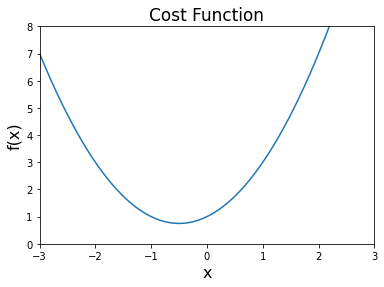

In [183]:
# Plot
plt.title('Cost Function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))  #(x,y)
plt.show()

## Slope & Derivatives

In [184]:
def df(x):
    return 2*x+1

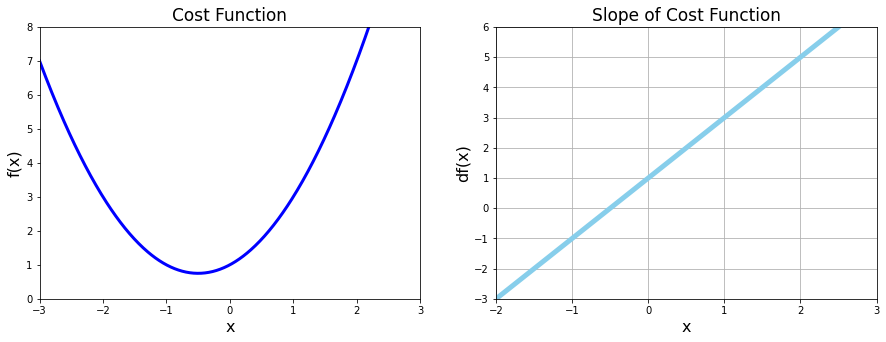

In [185]:
# Plot fucntion and derivative side by side

plt.figure(figsize=[15,5]) #width and height measured in inches

#2 plot side by side 

# first chart: cost function
plt.subplot(1,2,1) #row column and index

plt.title('Cost Function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)  #(x,y)

#second chart : Derivative
plt.subplot(1,2,2)
plt.title('Slope of Cost Function', fontsize=17)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

## Python Loops and Gradient Descent 

In [186]:
# Python for loop
for i in range(5):
    print('Hello World',i)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [187]:
# Python while loop
counter=0
while(counter<5):
    print('Counting...', counter)
    counter+=1
print('End of while loop')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
End of while loop


In [188]:
# Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1 #Learning rate
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x  #Prediction
    gradient = df(previous_x)  #Error
    new_x = previous_x - step_multiplier * gradient #Learning
    
    step_size = abs(new_x - previous_x) #will always be positive
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop run this many times:', n)
        break
    
print('Local minimum occours at: ', new_x)
print('Slope or df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))
    

Loop run this many times: 50
Local minimum occours at:  -0.49996003706460423
Slope or df(x) value at this point is :  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


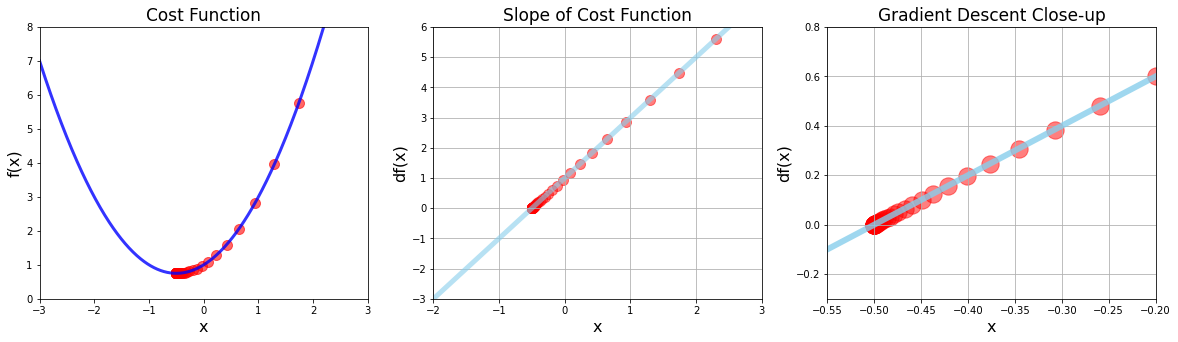

In [189]:
# Super impose the gradient descent calculation on the plot
plt.figure(figsize=[20,5]) #width and height measured in inches

#2 plot side by side 

# first chart: cost function
plt.subplot(1,3,1) #row column and index


plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)  #(x,y)

values = np.array(x_list) #f(x) needs array and not list
plt.scatter(x_list, f(values), color= 'red', s=100, alpha=0.6)

#second chart : Derivative
plt.subplot(1,3,2)

plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5 , alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

#Third chart : Derivative (close up)
plt.subplot(1,3,3)
plt.title('Gradient Descent Close-up', fontsize=17)
plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=6 , alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()

## Example 2- Multiple Minima vs Initial Guess and Advanced Functions
## $g(x)= x^4 - 4x^2 + 5$

In [190]:
#Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

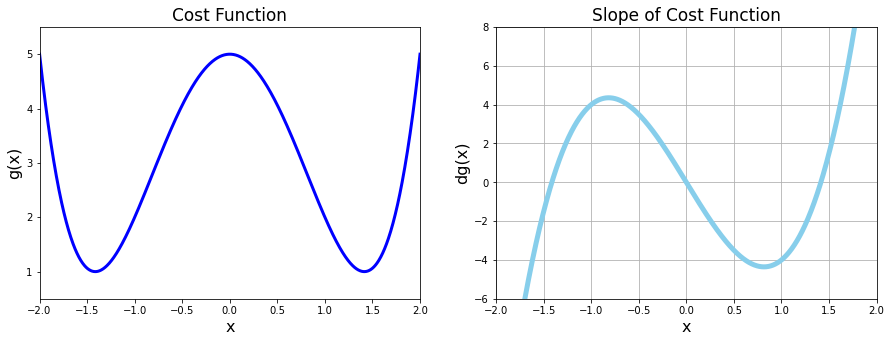

In [191]:
# Plot fucntion and derivative side by side

plt.figure(figsize=[15,5]) #width and height measured in inches

#2 plot side by side 

# first chart: cost function
plt.subplot(1,2,1) #row column and index


plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)  #(x,y)

#second chart : Derivative
plt.subplot(1,2,2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)


plt.show()

## Gradient Descent as a Python Fucntion

In [192]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):   #max no of times our loop will be running
        previous_x = new_x  #Prediction
        gradient = derivative_func(previous_x)  #Error
        new_x = previous_x - multiplier * gradient #Learning

        step_size = abs(new_x - previous_x)
        ##print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list   #tuples packing

In [193]:
local_min , list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                  multiplier=0.02, precision=0.001)
print('Local Min occours at: ', local_min)
print('Number of steps:', len(list_x))


Local Min occours at:  -1.4122375085019094
Number of steps: 23


In [194]:
local_min , list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001) #tuple unpacking
print('Local Min occours at: ', local_min)
print('Number of steps:', len(list_x))

Local Min occours at:  1.4122375085019094
Number of steps: 23


In [195]:
local_min , list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local Min occours at: ', local_min)
print('Number of steps:', len(list_x))

Local Min occours at:  -1.4120887490901561
Number of steps: 34


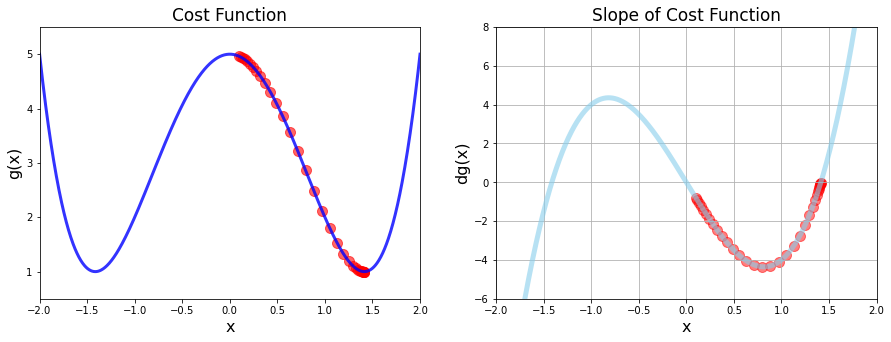

In [196]:
#Calling Gradient descent function
local_min , list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Plot fucntion and derivative and scatter plot side by side

plt.figure(figsize=[15,5]) #width and height measured in inches

#2 plot side by side 

# 1st chart: cost function
plt.subplot(1,2,1) #row column and index


plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  #(x,y)
plt.scatter(list_x, g(np.array(list_x)), color='red',s=100, alpha=0.6)

#2nd chart : Derivative
plt.subplot(1,2,2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

## Example 3 - divergence, Overflow and Python Tuples

## $h(x)= x^5 - 2x^4 + 2$

In [197]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3 

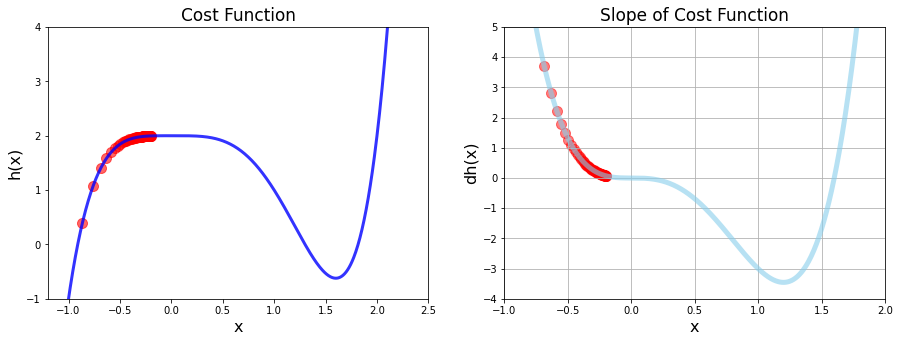

Local min occours at: -1.8398461123332792e+24
Cost at min is:  -2.1081790694225687e+121
Number of steps:  72


In [198]:
#Calling Gradient descent function
local_min , list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2,
                                                 max_iter=71)

# Plot fucntion and derivative and scatter plot side by side

plt.figure(figsize=[15,5]) #width and height measured in inches

#2 plot side by side 

# 1st chart: cost function
plt.subplot(1,2,1) #row column and index


plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)  #(x,y)
plt.scatter(list_x, h(np.array(list_x)), color='red',s=100, alpha=0.6)

#2nd chart : Derivative
plt.subplot(1,2,2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


print('Local min occours at:', local_min)
print('Cost at min is: ', h(local_min))
print('Number of steps: ', len(list_x))

## Python Tuples


In [199]:
# Creating a tuple-tuple packing
breakfast = 'bacon', 'eggs', 'avacado'
unlucky_numbers = 13,4,9,26,17

print('i love', breakfast[0])

i love bacon


In [200]:
# tuples contains mixed type of data - heterogenous
# lists are usually homogeneous
#tuples are immutable- cant be changed after we have made it

data_tuple = gradient_descent(derivative_func=dh,initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at min is: ', h(data_tuple[0]))
print('Number of steps: ', len(data_tuple[1]))

Local min is 1.5989534547394717
Cost at min is:  -0.6214287992331258
Number of steps:  117


# The Learning Rate

In [201]:
#Learning rate is same as multiplier
# when the slope was steep than gradeient was large number we take big step
# similarly LR/multiplier is large then also step will be large


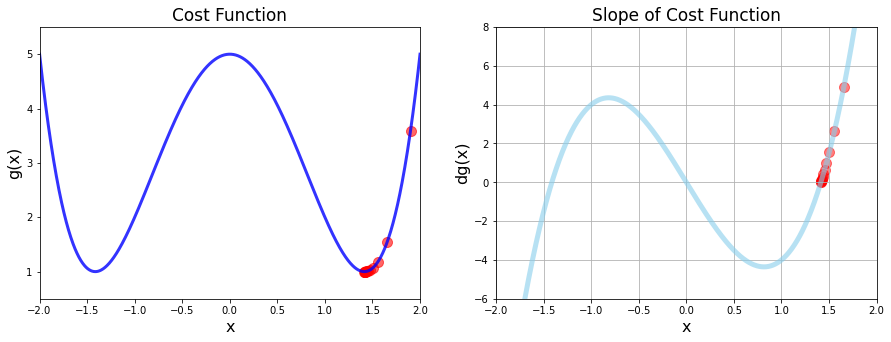

Number of steps is: 14


In [202]:
#Calling Gradient descent function
local_min , list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, 
                                                 multiplier=0.02, max_iter=500)

# Plot fucntion and derivative and scatter plot side by side

plt.figure(figsize=[15,5]) #width and height measured in inches

#2 plot side by side 

# 1st chart: cost function
plt.subplot(1,2,1) #row column and index


plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  #(x,y)
plt.scatter(list_x, g(np.array(list_x)), color='red',s=100, alpha=0.6)

#2nd chart : Derivative
plt.subplot(1,2,2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is:', len(list_x))


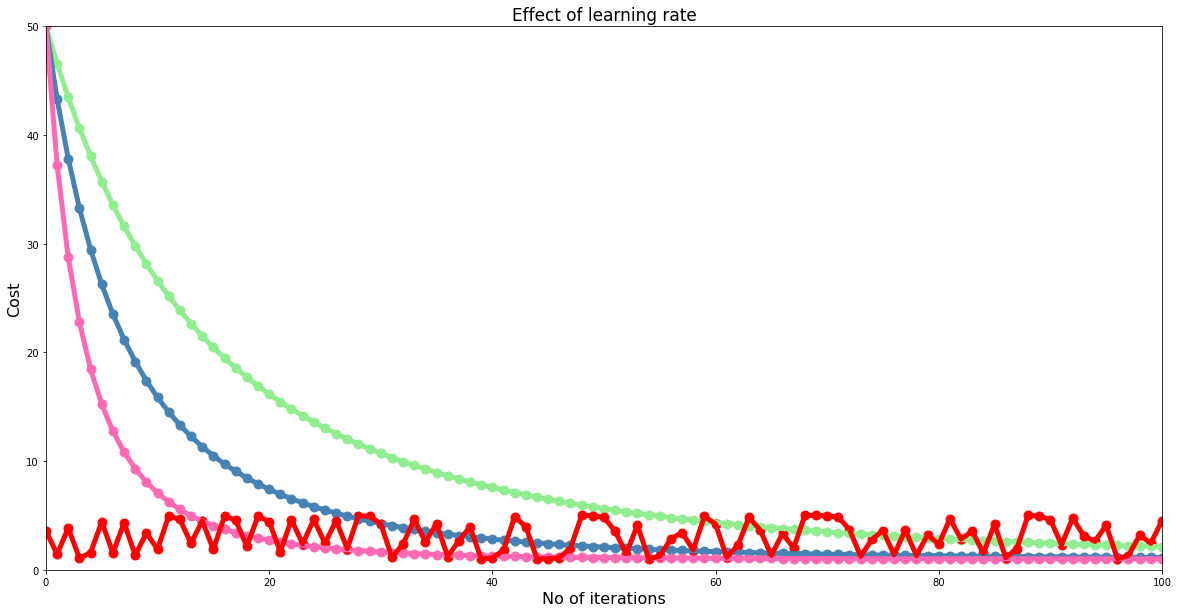

In [203]:
#Run gradient descent 3 times
n= 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.0005,precision=0.0001, max_iter=n)


mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.001,precision=0.0001, max_iter=n) 


high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.002,precision=0.0001, max_iter=n)
#Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, 
                                                 multiplier=0.25,precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10]) #width and height measured in inches

# 1st chart: cost function

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of learning rate', fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

#Values for our charts
# 1) Yaxis data : convert the list to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X axis Data : Create a list from 0 to n+1
iteration_list = list(range(0,n+1)) 

#plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)  #(x,y)
plt.scatter(iteration_list, g(low_values), color='lightgreen',s=80)

#plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)  #(x,y)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue',s=80)

#plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)  #(x,y)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink',s=80)


#plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)  #(x,y)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red',s=80)
plt.show()

# Example 4 - Dat Viz with 3D charts

## Minimise $ f(x,y) = \frac{1}{3^{-x^2 - y^2}+1}$

In [204]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1 / (r+1)

In [205]:
# Make our x and y data
x_4 = np.linspace(start=-2 , stop=2 , num=200)
y_4 = np.linspace(start=-2, stop=2 , num=200)

print('Shape of X array',x_4.shape)

x_4, y_4 = np.meshgrid(x_4,y_4) #return 2d array from 1d array
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


C:\Users\abhis\AppData\Local\Temp/ipykernel_5384/3170227911.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


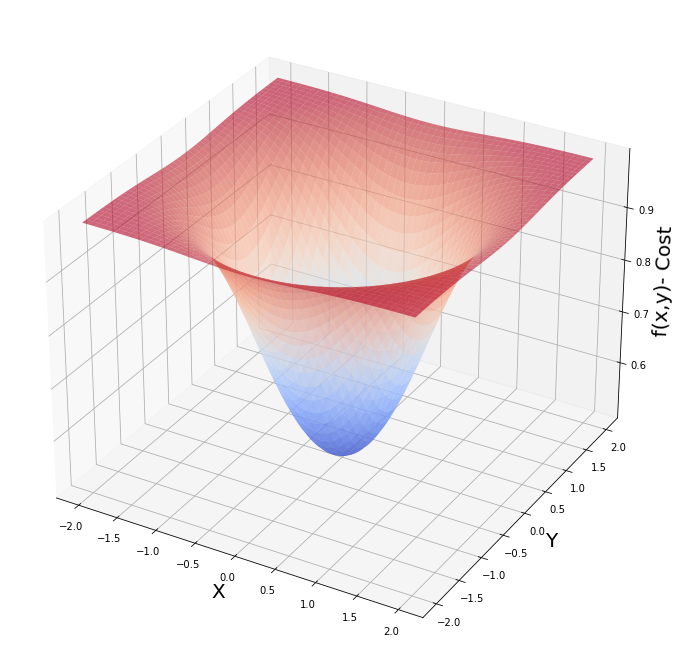

In [206]:
# Generating 3d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)- Cost',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap= cm.coolwarm, alpha=0.6)

plt.show()

## Partial Derivative and Symbolic Computation

## $ \frac{\partial f}{\partial x} =\frac{ 2x \ln(3) \cdot 3^{-x^2 - y^2}} {(3^{-x^2 - y^2}+1)^2}$

## $ \frac{\partial f}{\partial y} =\frac{ 2y \ln(3) \cdot 3^{-x^2 - y^2}} {(3^{-x^2 - y^2}+1)^2}$

In [207]:
a, b = symbols('x,y') # a stands for x and b for y
print('Our cost function f(x,y) is: ',f(a,b))
print('Partial derivative wrt x is: ',diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 and y=1.0 is: ',f(a,b).evalf(subs={a:1.8,b:1.0}))  #evalue cost at particular x and y #Python dictionary - key value pair
print('Value of partial derivative wrt x is: ',diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 and y=1.0 is:  0.990604794032582
Value of partial derivative wrt x is:  0.0368089716197505


## Batch Gradient Descent with Sympy

In [208]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8 , 1.0]) #initial guess for x and y

for n in range(max_iter):
    #using sympy
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array', gradients)
print('Minimum occours at x value of: ', params[0])
print('Minimum occours at Y value of: ', params[1])
print('Cost is:' , f(params[0],params[1]))
    

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occours at x value of:  3.458385998858304e-11
Minimum occours at Y value of:  1.9213255549212797e-11
Cost is: 0.5


In [209]:
# partial derivative functions example 4
def fpx(x,y):
    r= 3**(-x**2 - y**2)
    return 2*x*log(3) * r/ (r+1)**2

def fpy(x,y):
    r= 3**(-x**2 - y**2)
    return 2*y*log(3) * r/ (r+1)**2

In [210]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8 , 1.0]) #initial guess for x and y

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array', gradients)
print('Minimum occours at x value of: ', params[0])
print('Minimum occours at Y value of: ', params[1])
print('Cost is:' , f(params[0],params[1]))
    

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occours at x value of:  3.458385998858304e-11
Minimum occours at Y value of:  1.9213255549212797e-11
Cost is: 0.5


## Graphing 3D Gradient Descent and Adv Numpy Arrays

In [211]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8 , 1.0]) #initial guess for x and y
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array=np.concatenate((values_array,params.reshape(1,2)),axis=0)
    
    
#Results
print('Values in gradient array', gradients)
print('Minimum occours at x value of: ', params[0])
print('Minimum occours at Y value of: ', params[1])
print('Cost is:' , f(params[0],params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occours at x value of:  3.458385998858304e-11
Minimum occours at Y value of:  1.9213255549212797e-11
Cost is: 0.5


In [212]:
# Advanced numpy array

kirk= np.array([['Captain','Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove','Drums']])
print(hs_band.shape)

print(hs_band[0]) #first row
print(hs_band[0][1]) #first row and forst col
print(hs_band[1][1]) #second row secod col

the_roots = np.append(arr=hs_band , values=kirk , axis=0) #axis:Should we add val as row or as col 0:row and 1:col
#the_roots = np.append(arr=hs_band , values=kirk.reshape(2,1) , axis=1)
print(the_roots)
print(the_roots.shape)

#slicing an array
print('Printing nicknames....' , the_roots[:,0]) #take all rows and first col
the_roots = np.append(arr=the_roots, values=[['Malik B','MC']], axis=0)

print('Printing band rolls....', the_roots[:,1])

(1, 2)
(2, 2)
['Black Thought' 'MC']
MC
Drums
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
(3, 2)
Printing nicknames.... ['Black Thought' 'Questlove' 'Captain']
Printing band rolls.... ['MC' 'Drums' 'Guitar' 'MC']


C:\Users\abhis\AppData\Local\Temp/ipykernel_5384/3795875326.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


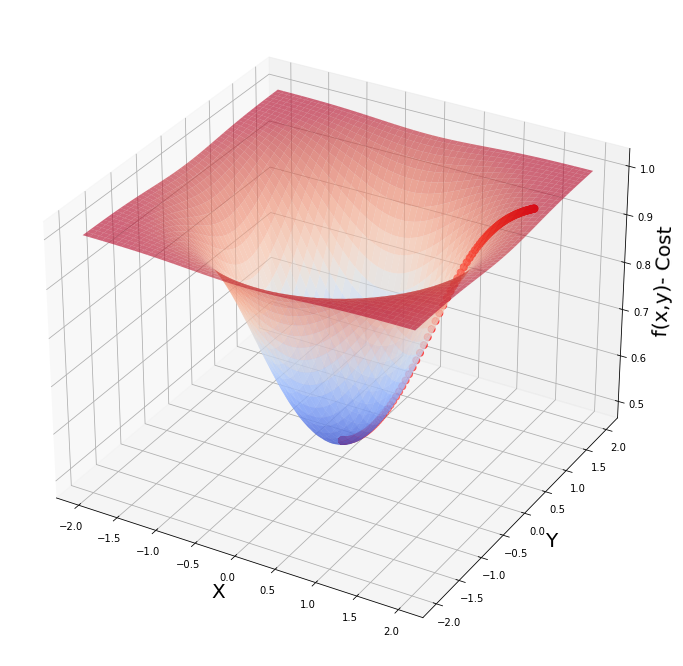

In [213]:
# Generating 3d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)- Cost',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap= cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:,0], values_array[:,1],
           f(values_array[:,0],values_array[:,1]), s=50, color='red')

plt.show()

# Example 5- Working with Data and Real Cost Function
## Mean Squared Error: a cost fucntion for regression problem

### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$

### $$ MSE =\frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$

### $$ MSE =\frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y}  \big)^2 $$

In [214]:
#by dividing sum by no of data points we can start to handle large data set 
# no overflow error
# therefore MSE used over RSS

In [215]:
# Make sample data
x_5 = np.array([[0.1, 1.2 , 2.4 , 3.2 , 4.1 , 5.7 , 6.5]]).transpose()
y_5 = np.array([1.7 , 2.4 , 3.5 , 3.0 , 6.1 , 9.4 , 9.2]).reshape(7,1)
print('Shape of x_5: ', x_5.shape)
print('Shape of y_5: ', y_5.shape)

Shape of x_5:  (7, 1)
Shape of y_5:  (7, 1)


In [216]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5,y_5)  #Requires 2d input 
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.6615589962626798
Theta 1:  1.3219434063000537


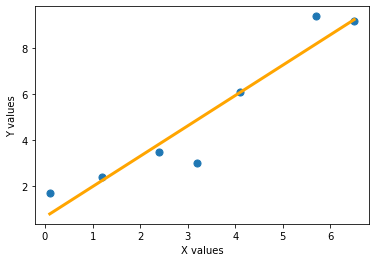

In [217]:
plt.scatter(x_5,y_5 , s=50)
plt.plot(x_5, regr.predict(x_5) , color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [218]:
# y_hat = theta0 + thata 1*x
y_hat = 0.6615589962626798 + 1.3219434063000537*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison actual y values are: \n' , y_5)
#ideally estimated values should be as close to actual values

Est values y_hat are: 
 [[0.79375334]
 [2.24789108]
 [3.83422317]
 [4.8917779 ]
 [6.08152696]
 [8.19663641]
 [9.25419114]]
In comparison actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [9.2]]


In [219]:
def mse(y,y_hat):
    #mse_calc = 1/7 * sum((y-y_hat)**2) # 7 data points
    #mse_calc = (1/y.size) * sum((y-y_hat)**2)
    mse_calc = np.average((y - y_hat)**2 , axis = 0)
    return mse_calc

In [220]:
print('Manually calculated MSE IS: ',mse(y_5, y_hat))
print('MSE regression using manual calc is: ', mean_squared_error(y_5,y_hat))
print('MSE regression is: ', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE IS:  [0.85518725]
MSE regression using manual calc is:  0.8551872473495542
MSE regression is:  0.8551872473495542


## 3D plot for MSE cost function
### Make data for thetas

In [240]:
nr_thetas = 200
th_0 = np.linspace(start=-1 , stop=3 , num=nr_thetas)
th_1 = np.linspace(start=-1 , stop=3 , num=nr_thetas)
plot_t0 , plot_t1 = np.meshgrid(th_0,th_1)

### Cal MSE using nested for loops

In [241]:
plot_cost = np.zeros((nr_thetas,nr_thetas)) #matrix of zeroes

for i in range(nr_thetas):
    for j in range(nr_thetas):
       # print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost [i][j] = mse(y_5 , y_hat)
        
print('Shape of plot_t0 ', plot_t0.shape)
print('Shape of plot_t1 ', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0  (200, 200)
Shape of plot_t1  (200, 200)
Shape of plot_cost (200, 200)


In [242]:
# Nested Loop practice
for i in range(3):
    for j in range(3):
        print(f'values of i is {i} and j is {j}')

values of i is 0 and j is 0
values of i is 0 and j is 1
values of i is 0 and j is 2
values of i is 1 and j is 0
values of i is 1 and j is 1
values of i is 1 and j is 2
values of i is 2 and j is 0
values of i is 2 and j is 1
values of i is 2 and j is 2


C:\Users\abhis\AppData\Local\Temp/ipykernel_5384/1020291009.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


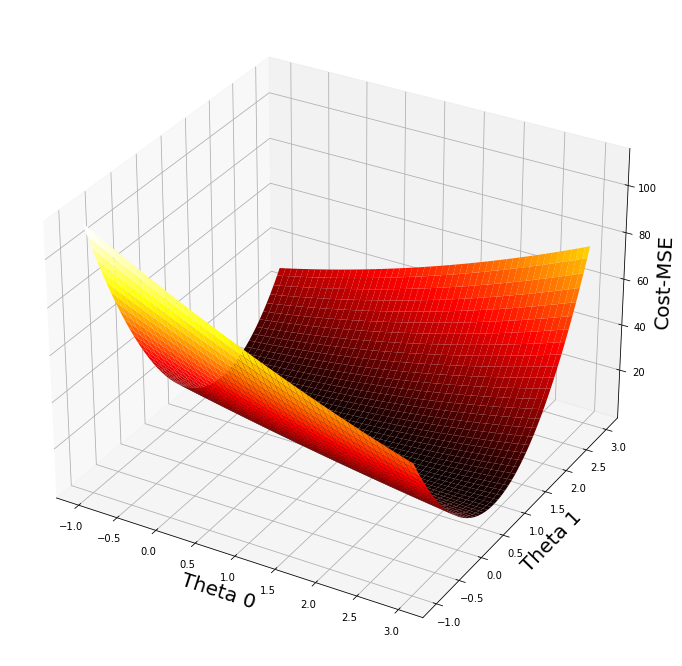

In [244]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost-MSE', fontsize=20)

ax.plot_surface(plot_t0 , plot_t1 , plot_cost , cmap=cm.hot)
plt.show()

In [250]:
print('Min value of plot_cost' , plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occours at [i,j]:' , ij_min)
print('Min MSE for Theta 0 at plot_t0[116][81]' , plot_t0[116][81])
print('Min MSE for Theta 1 at plot_t1[116][81]' , plot_t1[116][81])

Min value of plot_cost 0.8556216473609978
Min occours at [i,j]: (116, 81)
Min MSE for Theta 0 at plot_t0[116][81] 0.6281407035175879
Min MSE for Theta 1 at plot_t1[116][81] 1.3316582914572863


## Partial Derivatives of MSE wrt $\theta_0$ and $\theta_1$

## $$ \frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^ {(i)} \big) $$

## $$ \frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^ {(i)} \big)  \big(x^{(i)} \big)$$

## MSE and Gradient Descent

In [259]:
# x values , y values , array of theta parameters(theta0 at index 0 and theta1 at index 1)
def grad(x,y,thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y-thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y-thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    return np.append(arr  = theta0_slope, values = theta1_slope)
    #return np.concatenate((theta0_slope,theta1_slope),axis=0) #concatenate along rows
    

In [261]:
multiplier = 0.01
thetas = np.array([2.9 , 2.9])

#Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5 , thetas[0]+ thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5 , y_5 , thetas)
    
    #Append new values to numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr = mse_vals , values = mse(y_5, thetas[0]+thetas[1]*x_5))
    
# Results
print('Min occours at Theta 0: ', thetas[0])
print('Min occours at Theta 1:', thetas[1])
print('MSE is: ', mse(y_5, thetas[0]+thetas[1] * x_5))


Min occours at Theta 0:  0.6679456599388793
Min occours at Theta 1: 1.3205590085525993
MSE is:  [0.85519927]


C:\Users\abhis\AppData\Local\Temp/ipykernel_5384/2752414700.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


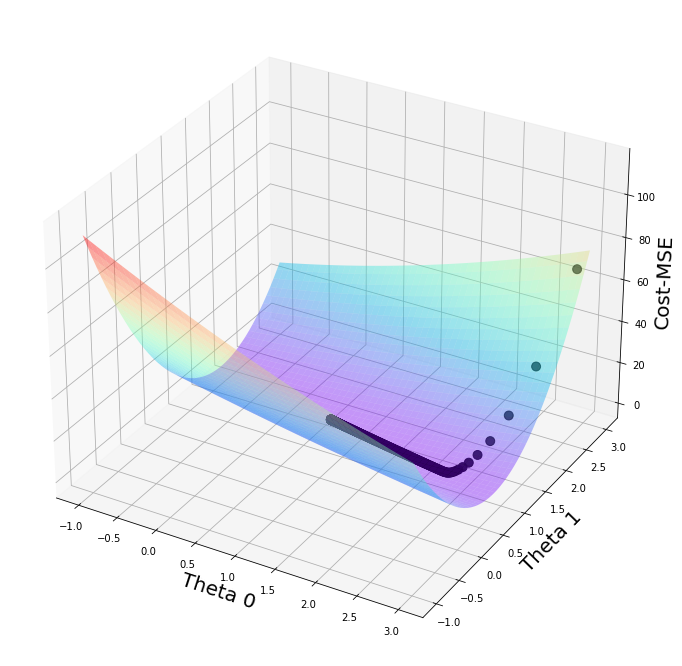

In [264]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost-MSE', fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals , s=80 , color='black')
ax.plot_surface(plot_t0 , plot_t1 , plot_cost , cmap=cm.rainbow , alpha=0.4)
plt.show()